### Necessary Imports

In [39]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

### Reading Data

In [40]:
# Read the dataset
df = pd.read_csv('price-prediction.csv')

### Visualize Datapoints in Data

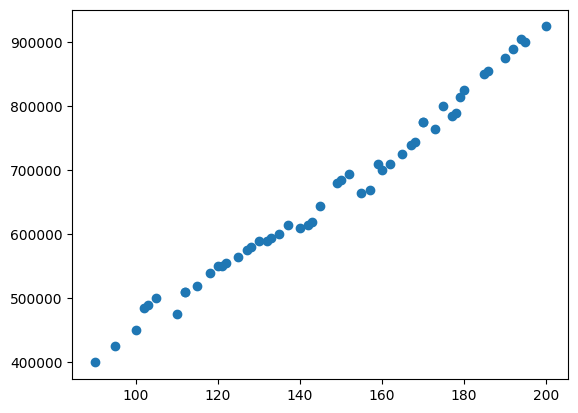

In [41]:
# Plot the dataset
plt.scatter(df['PLOTS'], df['PRICE'])


### Some Base Functions

In [42]:

def plot_data(m, b, data):
    # Plot the data points as a scatter plot
    plt.scatter(data['PLOTS'], data['PRICE'])

    # Find min and max values in the data
    x_min = data['PLOTS'].min()
    x_max = data['PLOTS'].max()

    # Plot the line defined by y = m * x + b
    plt.plot([x_min, x_max], [m * x_min + b, m * x_max + b], 'r')

    # Set the labels for the x and y axes
    plt.xlabel('Plot size')
    plt.ylabel('Price')

    # Set the title for the plot
    plt.title('Price prediction')

    # Display the plot
    plt.show()

In [43]:
def loss_function(m, c, points):
    # Initialize the total error to 0
    total_error = 0

    # Loop through all the points in the dataset
    for i in range(len(points)):
        # Get the 'x' and 'y' values of the current 'point'        
        x = points['PLOTS'][i]
        y = points['PRICE'][i]
        # Calculate the error for this point and add it to the total error
        total_error += (y - (m * x + c)) ** 2

    # Return the average error for all points
    return total_error / float(len(points))

In [44]:
# Formula of slope: -1/N * x * (y - (m * x + b))
# Formula of y_intercept: -1/N * (y - (m * x + b))
def gradien_descent(current_m, current_b, points, lr):
    # Initialize the gradients for m and b to 0
    m_gradient = 0
    b_gradient = 0
    # Get the number of points in the dataset
    N = float(len(points))
    # Loop through all the points in the dataset
    for i in range(len(points)):
        # Get the 'x' and 'y' values of the current 'point'
        x = points['PLOTS'][i]
        y = points['PRICE'][i]
        # Calculate the partial derivatives of the loss function with respect to m and b
        m_gradient += -(2/N) * x * (y - ((current_m * x) + current_b))
        b_gradient += -(2/N) * (y - ((current_m * x) + current_b))
    # Update 'm' and 'b' using gradient descent
    new_m = current_m - (lr * m_gradient)
    new_b = current_b - (lr * b_gradient)

    # Return the updated values of m and b
    return [new_m, new_b]

### Running Script

In [45]:
# Initialize the values of m and b to 0
m = 0
b = 0
# Set the learning rate and number of epochs for gradient descent  
learning_rate = 0.000001
epochs = 1000
# Perform gradient descent for the specified number of epochs
for i in range(epochs):
    # Update m and b using gradient descent
    m, b = gradien_descent(m, b, df, learning_rate)
    # Plot the current data
    #plot_data(m, b, df)
# Print the final values of m and b
print(m, b)

4512.131822445605 28.984850737807054


### Predicting New Data

In [46]:
# Read a datapoint as 'x' from the user
x = float(input('Enter the size of plot: '))
# Does a prediction by calculating mx+b
prediction = m * x + b
# Print the prediction
print(f'Price for {x} size of plot should be around $:{prediction}')

Price for 170.0 size of plot should be around $:767091.3946664907


<hr>